In [2]:
pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=088e52eb3bca49671cb6652d744eb46756aa352418a625ec8ee6b54b07ebd477
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [3]:
import pandas as pd
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ICT102/Mall_CustomersData_q3_dataset.csv")
X = data.iloc[:, [2, 3]].values

# Feature scaling (normalize the data between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [7]:
# Define the SOM parameters (e.g., grid size and the number of iterations)
grid_size = (10, 10)  # Adjust the grid size as needed
som = MiniSom(grid_size[0], grid_size[1], X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights randomly
som.random_weights_init(X)

In [8]:
# Train the SOM using your dataset
som.train_batch(X, 10000)  # You can adjust the number of iterations

# You can also use different training methods, such as online training or adaptive learning rates
# Check the MiniSom documentation for more details.

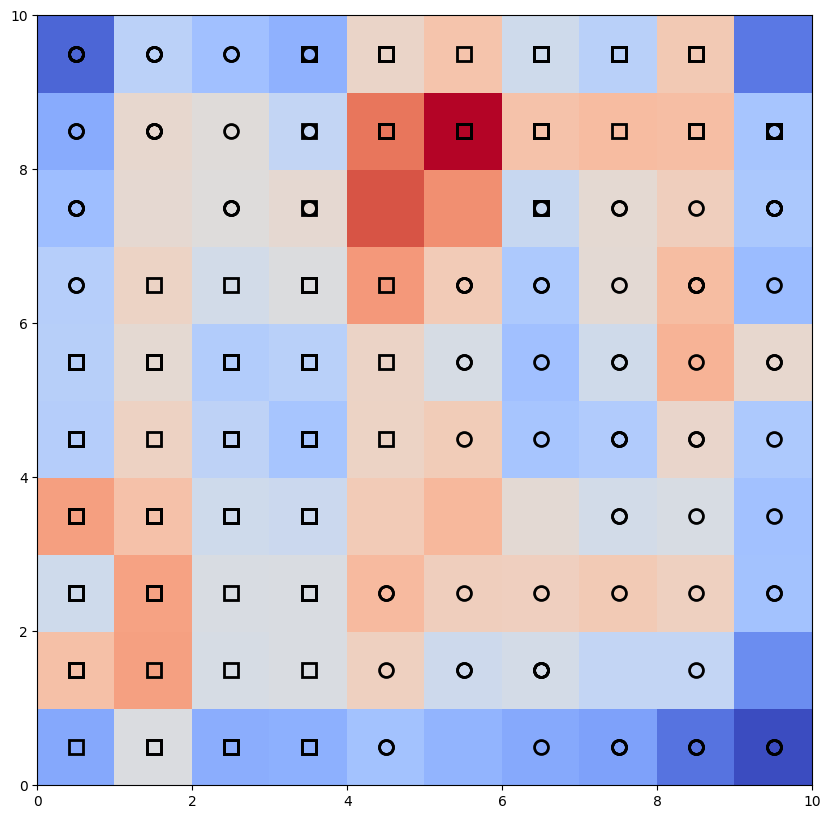

In [9]:
# Create a scatter plot of the data points and overlay the grid with different colors for each cluster
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Distance map shows cluster distances
markers = ['o', 's']  # You can use different markers for different data points

# Overlay the data points on the SOM grid
for i, x in enumerate(X):
    winning_node = som.winner(x)
    plt.plot(winning_node[0] + 0.5, winning_node[1] + 0.5, markers[i // (len(X) // len(markers))], markeredgecolor='k', markerfacecolor='None', markersize=10, markeredgewidth=2)

plt.show()


This code assumes that your dataset contains numerical features. The SOM is trained on these features, and the resulting map is visualized. Each data point is represented by a marker on the map, and similar points should be close to each other on the map. You might need to customize the code based on the actual columns and structure of your dataset.
